In [34]:
import cv2
import sys
from matplotlib import pyplot as plt 
import numpy as np
from scipy import signal
from PIL import Image
import math
from skimage.io import imread

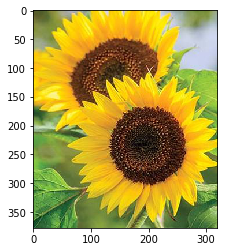

In [35]:
image = imread('Sunflower.jpg');
plt.imshow(image)

In [36]:
def grayscale(rgb):
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    gray = 0.2989*R + 0.5870*G + 0.1140*B
    
    return gray

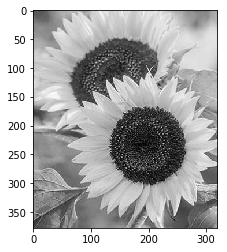

In [37]:
greyImg = grayscale(image);
plt.imshow(greyImg, cmap="gray")

In [65]:
def noise(image):
    row,col= image.shape
    mean = 0    #gaussian mean = 0              
    var = 400    #gaussian var = 0.01 
    sigma = var ** 0.5
    nse = np.random.normal(mean,sigma,(row,col))
    nse = nse.reshape(row,col)
    noise = image + nse
    
    return noise

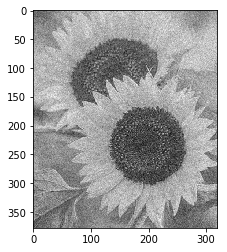

In [66]:
newI = noise(greyImg);
plt.imshow(newI, cmap = "gray")

Text(0.5, 1.0, 'With Noise')

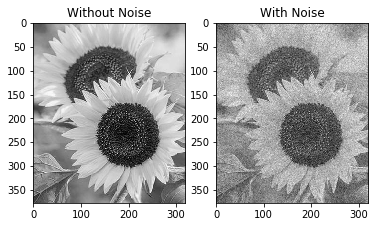

In [67]:
#side by side visualization for ease of comparison
fig, ax = plt.subplots(1,2)
ax[0].imshow(greyImg, cmap='gray')
ax[0].set_title("Without Noise")
ax[1].imshow(newI, cmap='gray')
ax[1].set_title("With Noise")

In [68]:
D = Image.open('Sunflower.jpg')
width, height = D.size
print ("width = {}, height = {}".format(width,height))

width = 320, height = 378


In [69]:
def sobel(im):

    im = im.astype(np.float)
    width, height= im.shape

    kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
    kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
   
    gx = signal.convolve2d(im, kh, mode='same', boundary = 'symm', fillvalue=0)
    gy = signal.convolve2d(im, kv, mode='same', boundary = 'symm', fillvalue=0)

    g = np.sqrt(gx * gx + gy * gy)
    g *= 255.0 / np.max(g)
    
    return g

In [70]:
detect = sobel(newI);
detect2 = sobel(greyImg);

Text(0.5, 1.0, 'With Sobel Filter')

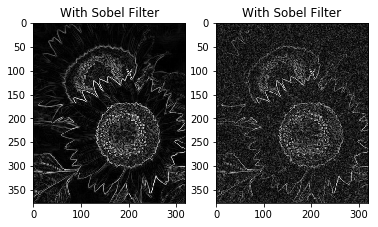

In [71]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(detect2, cmap='gray')
ax[0].set_title("With Sobel Filter")
ax[1].imshow(detect, cmap='gray')
ax[1].set_title("With Sobel Filter")